<a href="https://colab.research.google.com/github/Bhaktaraj-Pooja/ML-Project/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install and Import Packages**

In [ ]:
!pip install torch torchvision torchaudio
!pip install easyocr

In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

#**Read Images**

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
image_path = "/content/drive/MyDrive/OCR_DataSet/tmp/TE_144.jpg"

In [8]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image_path)
result

Using CPU. Note: This module is much faster with a GPU.


[([[341, 99], [505, 99], [505, 135], [341, 135]],
  'Arthurs',
  0.999189861502863),
 ([[350, 132], [520, 132], [520, 164], [350, 164]],
  '287 Rashington',
  0.34563185584856815),
 ([[328, 162], [462, 162], [462, 190], [328, 190]],
  'Hobcken;, WJ',
  0.4643874731315228),
 ([[476, 156], [542, 156], [542, 188], [476, 188]],
  '07030',
  0.9993768129325346),
 ([[353, 185], [519, 185], [519, 221], [353, 221]],
  '(201) 856-5009',
  0.6400829571280471),
 ([[220, 246], [374, 246], [374, 278], [220, 278]],
  'J0Ee Alerandr',
  0.1289834362847098),
 ([[588, 292], [632, 292], [632, 324], [588, 324]], 'Gst', 0.9997787292479727),
 ([[212, 304], [310, 304], [310, 334], [212, 334]],
  'C 1844',
  0.42361985424497917),
 ([[412, 302], [486, 302], [486, 334], [412, 334]],
  'Tab/62',
  0.5441892897269922),
 ([[345, 327], [531, 327], [531, 363], [345, 363]],
  "Octoi'17 01:44P0",
  0.3392068331578709),
 ([[260, 388], [330, 388], [330, 414], [260, 414]], 'Bar', 0.9998284887862258),
 ([[260, 416], [334

In [22]:
result[34]

([[578, 706], [630, 706], [630, 736], [578, 736]], '78', 0.9994012420370421)

#**Draw Results**

In [14]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

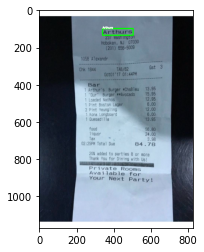

In [16]:
img = cv2.imread(image_path)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255,255,255),2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

#**Multiple Lines**

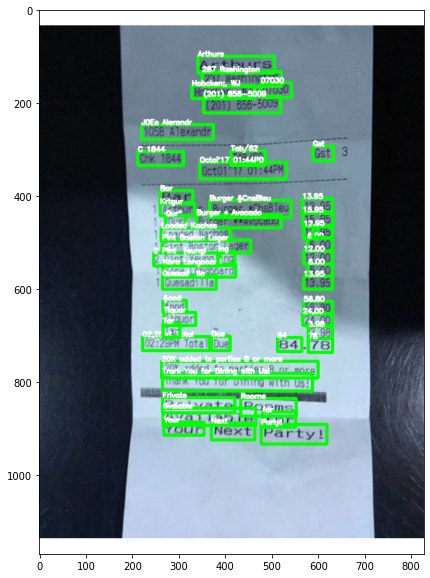

In [24]:
img = cv2.imread(image_path)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img = cv2.putText(img, text, top_left, font, .5, (255,255,255),2, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()